<a id='home'></a>

## **Table of Contents**

* [1 - Intro to Research Methods](#intro)
 

* [2 - Visualising Data](#viz)


* [3 - Central Tendency](#central)


* [4 - Variability](#var)


* [5 - Standardizing](#std)
    
    
* [6 - Normal Distribution](#normal)

    
* [7 - Sampling Distribution](#sample)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

## Descriptive Statistics

<a id='intro'></a>

## 1 - Intro to Research Methods

###### Data : Relationship between hand lenght and height

In [2]:
df = pd.read_csv('data/Height and hand length of Udacians - Lesson 1 - Sheet1.csv')
print df.columns
df.head()

Index([u'Hand length (in)', u'Height (in)', u'Gender'], dtype='object')


,Hand length (in),Height (in),Gender
0,7.5000,71.0,M
1,7.6250,68.5,M
2,7.5625,67.0,M
3,7.0000,61.0,F
4,7.6250,67.0,F


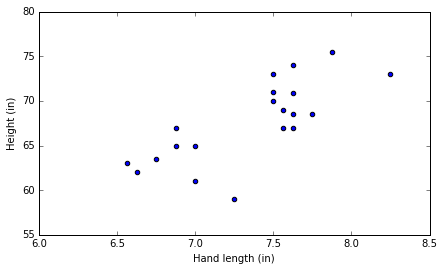

In [3]:
fig,ax = plt.subplots(figsize=(7,4))
ax.scatter(df['Hand length (in)'],df['Height (in)'])
ax.set_ylabel('Height (in)')
ax.set_xlabel('Hand length (in)');

[Home](#home)

<a id='viz'></a>

## 2 - Visualising Data

#### Histogram & Different Bin Sizes

###### Data: Udacity Student Ages Data

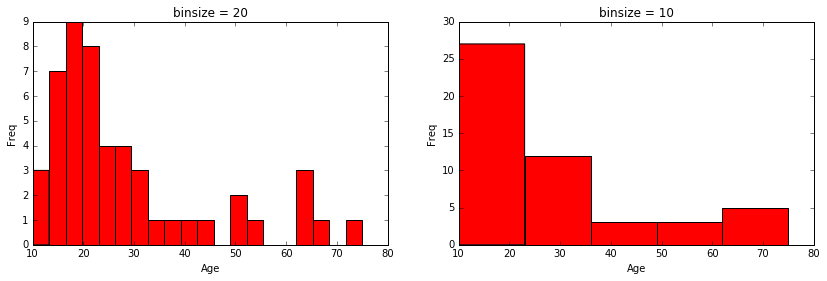

In [4]:
df = pd.read_csv('data/Udacity Student Ages Data - Sheet1.csv', header=None)
df = pd.DataFrame(df.values.ravel())

fig,ax = plt.subplots(1,2,figsize=(14,4))
ax[0].hist(df,bins=20,color='r')
ax[0].set_title('binsize = 20')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Freq')
ax[1].hist(df,bins=5,color='r')
ax[1].set_title('binsize = 10')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Freq');

# note that the dist is positively2 skewed

In [5]:
print '\nthe proportion of people age >60 is {}\n'.format((df[df>60].count()/df.count()).values[0])

print 'the percentage of people age < 20 is {}%\n'.format(((df[df<20].count()/df.count())*100).values[0])


the proportion of people age >60 is 0.1

the percentage of people age < 20 is 38.0%



[Home](#home)

<a id='central'></a>

## 3 - Central Tendency

#### Mean, Median, Mode

In [6]:
# Measures of tendency
print df.mean()
print df.median()
print df.mode()
# note that mode<median<mean for positively skewed data


0    28.32
dtype: float64
0    22.0
dtype: float64
    0
0  18


In [7]:
df = pd.read_csv('data/How many Facebook friends do Udacians have_ - Lesson 3 - Sheet1.csv')

print 'mean = {} media = {} mode = {}'.format(df.mean().values, df.median().values, df.mode().values)

mean = [ 584.74074074] media = [ 479.] mode = []


###### Data : Sample Memory Scores

In [8]:
df = pd.read_csv('data/Sample Memory Scores - PS3, PS4 - Sheet1.csv',usecols=([0,1]))
print df.columns

print 'mean = {} media = {} mode = {}'.format(df.mean().values, df.median().values, df.mode().values)
df.describe()

Index([u'Recognition Score', u'Temporal Memory Score'], dtype='object')
mean = [ 93.11555556  78.02666667] media = [ 92.  80.] mode = [[100  86]]


,Recognition Score,Temporal Memory Score
count,225.000000,225.000000
mean,93.115556,78.026667
std,22.619030,12.808312
min,10.000000,10.000000
25%,87.000000,70.000000
50%,92.000000,80.000000
75%,100.000000,86.000000
max,200.000000,100.000000


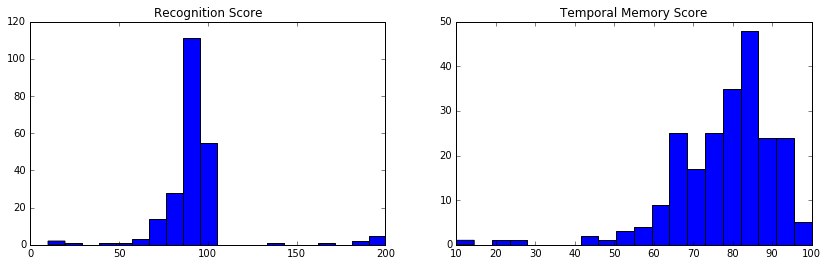

In [9]:
# distribution
fig,ax = plt.subplots(1,2,figsize=(14,4))
ax[0].hist(df['Recognition Score'],bins=20)
ax[0].set_title('Recognition Score')
ax[1].hist(df['Temporal Memory Score'],bins=20)
ax[1].set_title('Temporal Memory Score');


#### Plotting with Seaborn

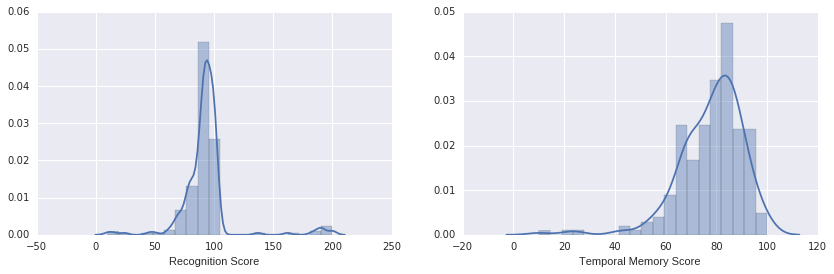

In [10]:
import seaborn as sns
# sns.set(color_codes=True)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
sns.distplot(df['Temporal Memory Score'],ax=ax2 , bins=20);
sns.distplot(df['Recognition Score'],ax=ax1 , bins=20);

[Home](#home)

<a id='var'></a>

## 4 - Variability

#### Inter Quantile Range (IQR)

In [11]:
Q1 = df.quantile(.25)
Q2 = df.quantile(.5)
Q3 = df.quantile(.75)

IQR = Q3 - Q1

print  ' -- Q1 -- Q2 -- Q3 --'
IQR

 -- Q1 -- Q2 -- Q3 --


Recognition Score        13.0
Temporal Memory Score    16.0
dtype: float64

#### Outlier & Boxplots

Min val inside

Recognition Score        67.5
Temporal Memory Score    46.0
dtype: float64

Max val inside

Recognition Score        119.5
Temporal Memory Score    110.0
dtype: float64


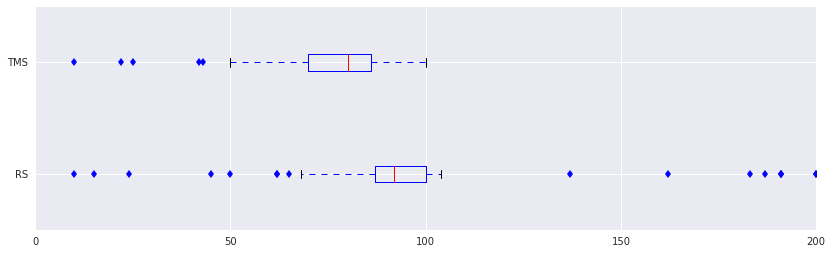

In [12]:
# Outlier = < Q1 - 1.5 * IQR or
#         = > Q3 + 1.5 * IQR
# whis = 1.5
print 'Min val inside\n'
print Q1-1.5*IQR
print '\nMax val inside\n'
print Q3+ 1.5*IQR
fig,ax = plt.subplots(figsize=(14,4))
ax.boxplot(df.values,0,'gd',0,labels=['RS','TMS'],whis=1.5);

###### Data : Social Networkers Salary n=100

In [13]:
df = pd.read_csv('data/Sample Social Networkers Salary n=100 - Lesson 4 - Sheet1.csv',usecols=([0]))
print df.columns
df.describe()

Index([u'salary'], dtype='object')


,salary
count,100.000000
mean,50586.363300
std,10710.640427
min,24497.780000
25%,43188.750000
50%,52242.070000
75%,57978.635000
max,83017.280000


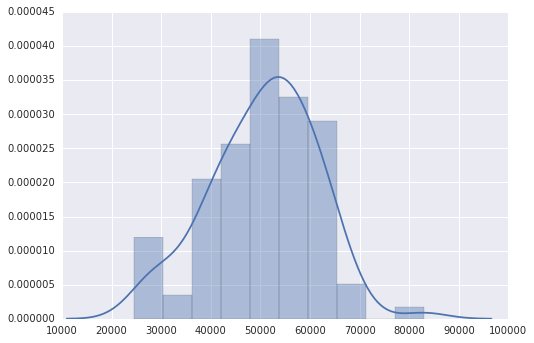

In [14]:
sns.distplot(df, bins=10);

####  Stavdart Deviation

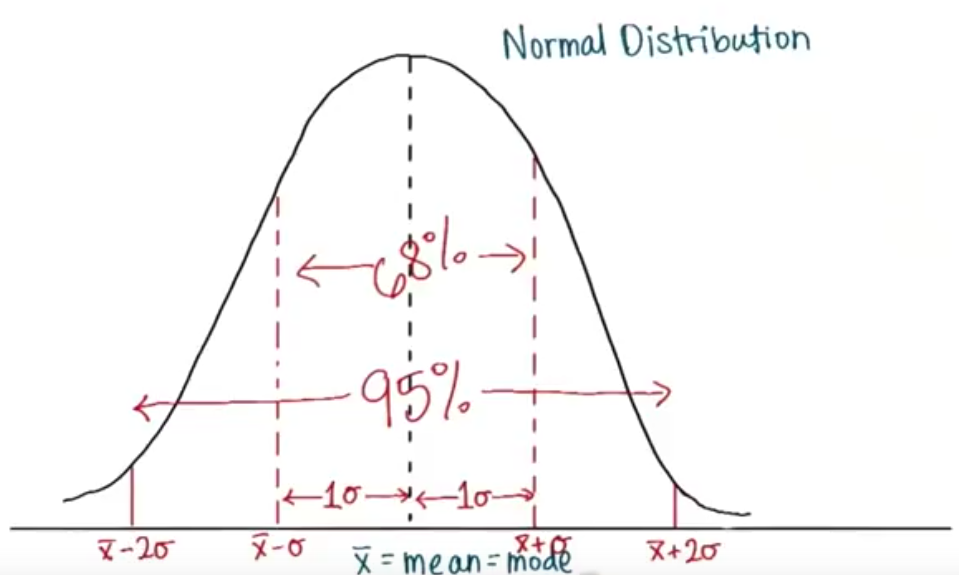

In [15]:
Image(filename='./ss/Screenshot from 2016-12-23 01-11-05.png', width=400)

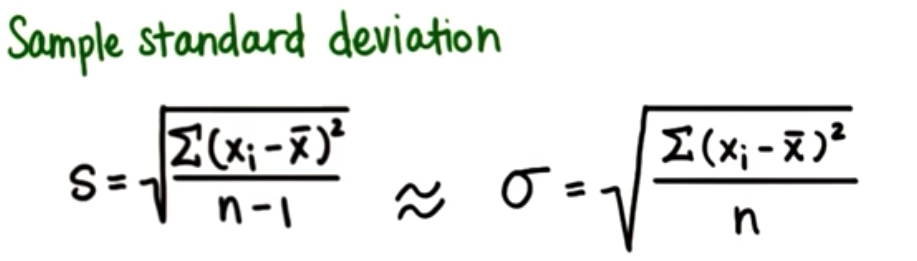

In [16]:
Image(filename='./ss/Screenshot from 2016-12-23 01-22-11.png', width=400) 

###### Data : How many Facebook friends do Udacians have_

In [17]:
df = pd.read_csv('data/How many Facebook friends do Udacians have_ - Lesson 3 - Sheet1.csv',usecols=([1]))
print 'pop variance = {}\n'.format(df.var(ddof=0).values )
print 'pop std dev = {}\n'.format(df.std(ddof=0).values) 
print 'sample std dev = {}\n'.format(df.std(ddof=1).values)

pop variance = [ 184385.5994513]

pop std dev = [ 429.40144323]

sample std dev = [ 437.58125334]



[Home](#home)

<a id='std'></a>

## 5 - Standardizing

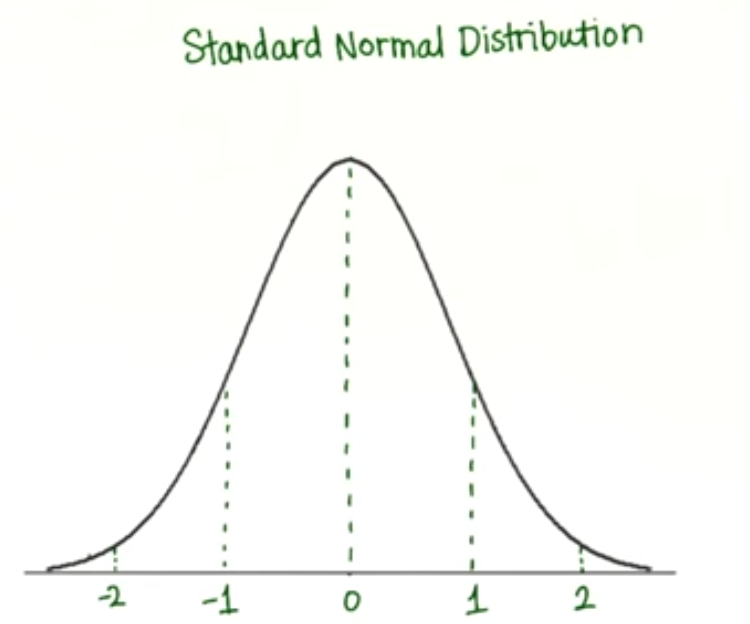

In [18]:
Image(filename='./ss/Screenshot from 2016-12-23 16-03-03.png', width=400) 

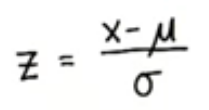

In [19]:
Image(filename='./ss/zscore.png', width=100) 

#### Mini scipy tutorial

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm


    import scipy.stats
    
    scipy.stats.norm(0, 1)
    # <scipy.stats.distributions.rv_frozen object at 0x928352c>
    scipy.stats.norm(0, 1).pdf(0)
    # 0.3989422804014327
    scipy.stats.norm(0, 1).cdf(0)
    # 0.5

#### Plot the standart normal distribution with scipy.stats


mean=0.0, var=1.0, skewness=0.0, kurtosis0.0


True

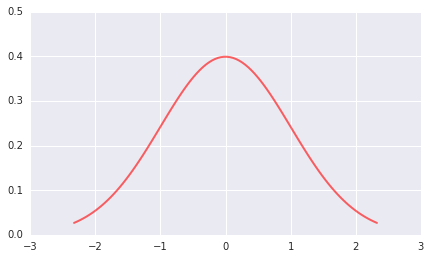

In [20]:
from scipy.stats import norm
# norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi)

# Calculate a few first moments:
mean, var, skew, kurt = norm.stats(moments='mvsk')
print '\nmean={}, var={}, skewness={}, kurtosis{}'.format(mean, var, skew, kurt)
#Display the probability density function (pdf):
fig, ax = plt.subplots(1, 1,figsize=(7,4))
# ppf is inverse of cdf
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),'r-', lw=2, alpha=0.6, label='norm pdf')
ax.set_ylim([0,.5]);

# Check accuracy of cdf and ppf:
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

[Home](#home)

<a id='normal'></a>

## 5 - Normal Distribution 

###### Data : Karma Points Per Post

In [21]:
df = pd.read_csv('data/Karma points per post (Lesson 6) - Sheet1.csv',usecols=([0]), header=None)
mu = round(df.mean())
sigma = round(df.std(ddof=1),1) # sample standart dev
z1 = norm.cdf(5,mu,sigma) # the proportion of less than 5 points per post on average
z2 = 1 - norm.cdf(20,mu,sigma) # the proportion of more than 20 points per post on average
# or 
z3 = norm.sf(20,mu,sigma) # survival func which gives 1-cdf
z4 = norm.cdf(16,mu,sigma) - norm.cdf(10,mu,sigma)# between 10 and 16
score = (norm.ppf(.95)*sigma)+mu # what score is needed to be in the top %5

[Home](#home)

<a id='sample'></a>

## 6 - Sampling Distribtion

http://onlinestatbook.com/stat_sim/sampling_dist/index.html

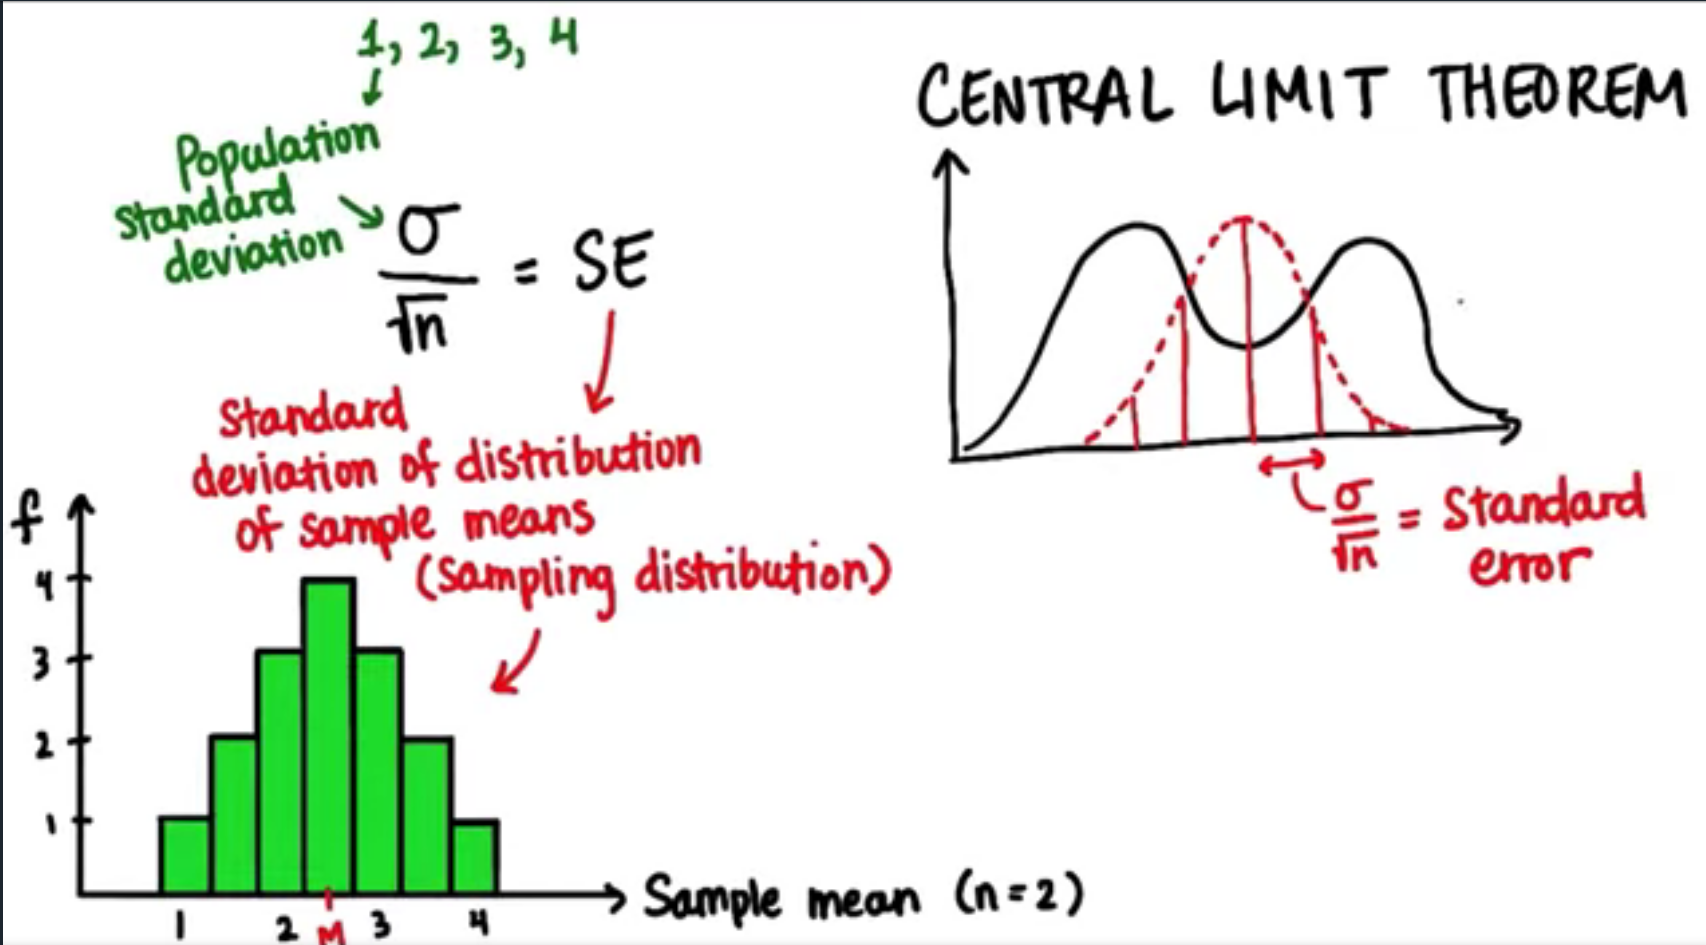

In [22]:
Image(filename='./ss/CLT.png', width=600) 

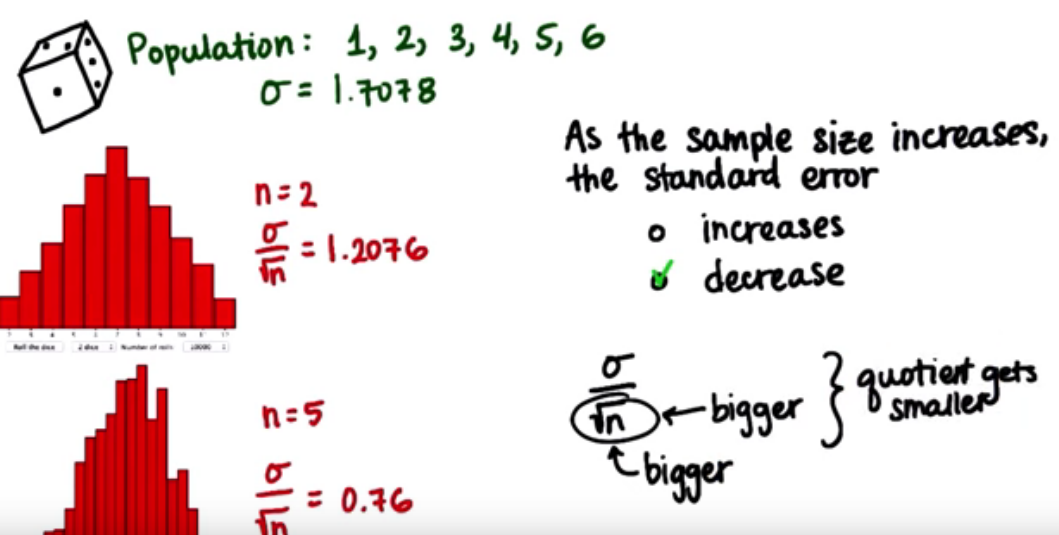

In [23]:
Image(filename='./ss/samplesizeandstandarterror.png', width=600) 

###### Data : Klout Scores

,0
count,1048.000000
mean,37.719055
std,16.044315
min,10.000000
25%,23.174620
50%,41.094683
75%,50.284432
max,87.247529


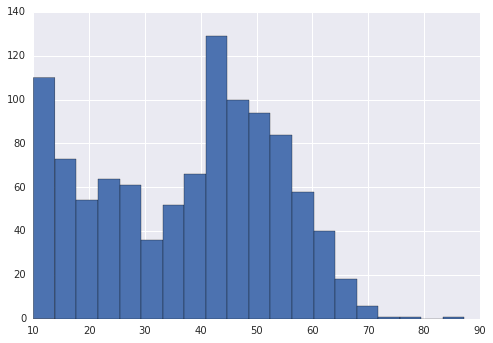

In [24]:
df = pd.read_csv('data/Klout scores (Lesson 7) - Sheet1.csv',usecols=([0]), header=None)
# a quick look to the data
plt.hist(df,bins=20);
df.describe()

####  CLT Experiment

The standart error of the mean derived from CLT is 2.7107
True SE of the mean is 2.6227

The population mean is 37.7191
The expected value of the means is 37.6265


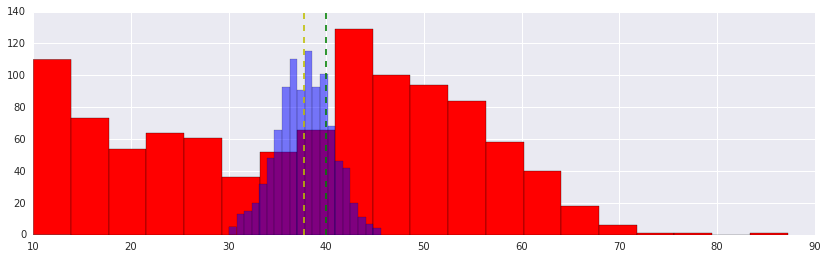

In [25]:
# take a samples of size 35 (n=35)
n = 35

def sampler(n):
    sample_means = []
    for i in range(1000):
        sample = df.loc[np.random.permutation(len(df))[:n]]
        sample_means.append(np.asscalar(sample.mean().values))
    return sample_means

print 'The standart error of the mean derived from CLT is {}'.format(round((df.std(ddof=0)/np.sqrt(n)).values[0],4)) 
print 'True SE of the mean is {}\n'.format(round(np.asarray( sampler(n)).std(),4))
print 'The population mean is {}'.format(round(df.mean(),4))
print 'The expected value of the means is {}'.format(round(np.asarray( sampler(n)).mean(),4))

fig,ax = plt.subplots(figsize=(14,4))
ax.hist(df,color='r',bins=20);
ax.hist(sampler(n),color='b',bins=20,alpha=.5);
ax.axvline(np.asarray(sampler(n)).mean(), color='y', linestyle='dashed',linewidth=2,alpha=.8)
ax.axvline(40, color='g', linestyle='dashed',linewidth=2,alpha=.8);

In [26]:
# using a Bieber Twitter affects the Klout score?
xbar_bieber = 40
mu = round(df.mean(),2)
SE = round(df.std(ddof=1)/np.sqrt(n),2)

# calculate the probabilty of randomly drawing a sample of size 35 with mean of at least 40
z = (xbar_bieber-mu)/SE
print 'the z-score is {}'.format(round(z,2))
print norm.sf(z)
# or
print 'the likelohood of randomly selecting from the KLOUT population'
print 'a sample of size {} and whose mean is at least 40 is {}%'.format(n,round(norm.sf(xbar_bieber,mu,SE),4)*100)

the z-score is 0.84
0.200081988632
the likelohood of randomly selecting from the KLOUT population
a sample of size 35 and whose mean is at least 40 is 20.01%


the likelohood of randomly selecting from the KLOUT population
a sample of size 250 and whose mean is at least 40 is 1.199%


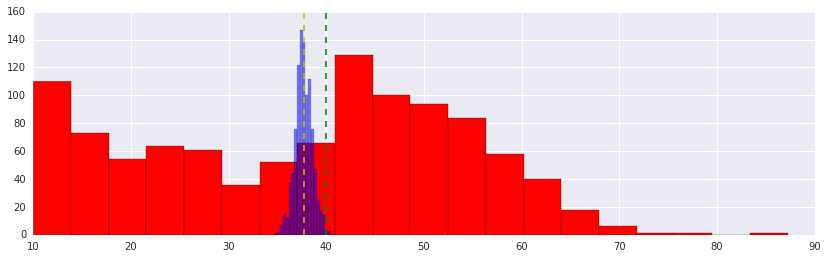

In [27]:
# What if the sample size n is 250 and they have mean KLOUT score 40
# Now, what is the likelohood of randomly selecting from the KLOUT population
# a sample of size 250 and whose mean is at least 40
n=250
SE = round(df.std(ddof=1)/np.sqrt(n),2)


print 'the likelohood of randomly selecting from the KLOUT population'
print 'a sample of size {} and whose mean is at least 40 is {}%'.format(n,round(norm.sf(xbar_bieber,mu,SE),5)*100)

fig,ax = plt.subplots(figsize=(14,4))
ax.hist(df,color='r',bins=20);
ax.hist(sampler(n),color='b',bins=20,alpha=.5);
ax.axvline(np.asarray(sampler(n)).mean(), color='y', linestyle='dashed',linewidth=2,alpha=.8)
ax.axvline(40, color='g', linestyle='dashed',linewidth=2,alpha=.8);

[Home](#home)